# Scribble visualisation:

#### This Notebook is a visualisation tool:
#### With this notebook you can:
#### - Visualize pathologist annotations
#### - Create scribbles for healthy regions and metastatic regions
#### - Send pathologist annotations and scribbles annotations to cytomine

In [1]:
import sys
from pathlib import Path
sys.path.append('/home/ahabis/2-Scribble_project')

### Libraries to import 

In [18]:
from config import *
from utils import *
from cytomine.models import ProjectCollection
from cytomine import Cytomine
from cytomine.models import CurrentUser
from send_annotation import *
from dell_annotation import delete_annotations
from send_annotation import Send
from scribble_inside_shape import Scribble
import warnings
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
pb_key = '868c4bac-e5b8-4758-9b4a-2980571c6bb2'
pv_key = '1476d15a-ec6e-48e0-95ea-d45a0ab0ff94'
host = 'https://nsclc.cytomine.com'

### Image Selection

In [19]:
### CHOOSE THE IMAGE YOU WANT TO WOR WITH 
filename = 'tumor_001'
#### Write if the image comes from train or test set
split = 'train'
###### CHECK THE ID on CYTOMINE
project = 10355395
image = 10355813
####
if split == 'train':
    path_image = os.path.join(path_slide_tumor_train,filename+'.tif')
else:
    path_image = os.path.join(path_slide_tumor_test,filename+'.tif')

In [20]:
img = OpenSlide(path_image)

### Visualisation of the Scribble

In [21]:
s = Scribble(filename,
             percent=0.0,
             show = True,
             split =split)
dataframe_annotation = s.create_dataframe_annotations()

In [ ]:
def visualize_scribble(dataframe_annotation,annotation_id):

    size1 = 15
    size2 = 12
    
    ann = dataframe_annotation[annotation_id]
    ann = ann[~ann.isnull()]
    ann_not_null = np.stack(ann)
    top = ann_not_null[:10]
    ann = np.concatenate([ann_not_null, top],0)


    plt.plot(ann[:,0], ann[:,1],color='orange',label='original contour')
    plt.legend(loc=3, prop={'size': size1})
    plt.axis('off')

    plt.show()
    arr, contour, scribble,coordinates = s.scribble(ann_not_null)

    plt.plot(contour[:,0], contour[:,1])
    plt.scatter(coordinates[:,0], coordinates[:,1],color='k', label='sampled points')
    plt.axis('off')

        

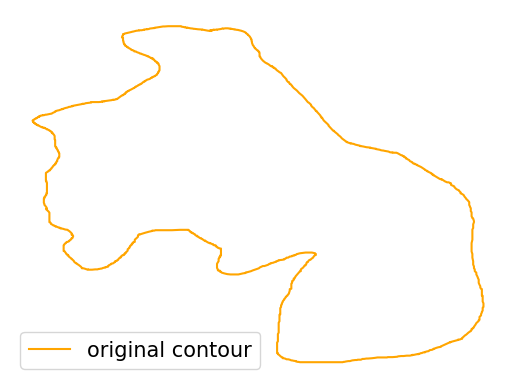

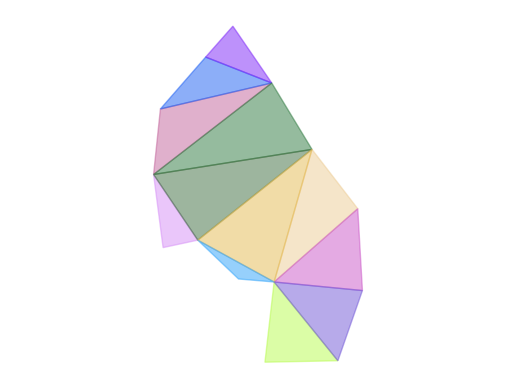

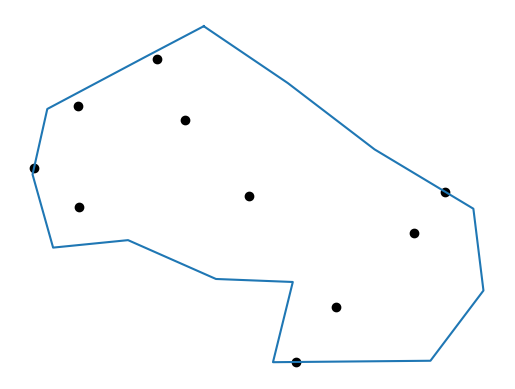

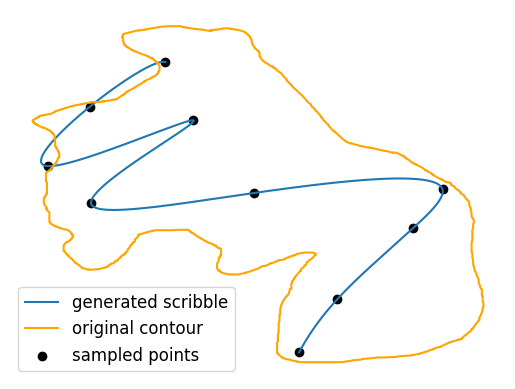

In [ ]:
visualize_scribble(dataframe_annotation,annotation_id)

### This code will take the pathologists annotations and generate scribbles and send them to cytomine

In [15]:
contour_tumor, scribble_tumor, contour_healthy, scribble_healthy = get_scribbles_and_annotations(os.path.join(path_slide_tumor_train,filename), 'train')

(227, 1, 2)


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00, 19.62it/s]


In [68]:
S = Send(filename,split='train')
S.send_annotations_to_cytomine(shapes,
                               scribbles,
                               contour_foreground,
                               scribble_foreground,
                               id_image=image,
                               id_project=project)

AttributeError: 'NoneType' object has no attribute 'squeeze'